# Camera Calibration
<b>woflydev | FTC 17556</b>

### Import Packages

In [6]:
import numpy as np
import cv2
import glob
import pickle
import collections
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Calibrate

Extract `objpoints` and `imgpoints` using images of calibration grid taken from the camera.

In [9]:
cell_size = 0.07 # Size of the square cell (should not affect the result)
objp = np.zeros((6*9,3), np.float32) # Using a 6x9 grid image for calibration
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)*cell_size # Grid points

# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

# Make a list of calibration images
images = glob.glob('images/*.jpg')

# Step through the list and search for grid corners
for image in images:
    img = mpimg.imread(image)
    gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Find the grid corners
    ret, corners = cv2.findChessboardCorners(gray_img, (9,6),None)

    # If found, append object points and image points to the respective arrays
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('Corner Detection',img)
        cv2.waitKey(500) # Viewing delay in milliseconds

cv2.destroyAllWindows()

Use the `objpoints` and `imgpoints` to calibrate the camera for a specified `imgsize`.

In [11]:
img = mpimg.imread('images/1.jpg') # Read in a test calibration image
img_size = (img.shape[1], img.shape[0]) # Get the image dimensions

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None) # Calibrate the camera

# Print the camera calibration result
print('Distortion Coefficients:')
print('dist = \n' + str(dist))
print('')

print('Camera Intrinsic Parameters:')
print('mtx = \n' + str(mtx))
print('')

print('Camera Extrinsic Parameters:')
print('rvecs = \n' + str(rvecs))
print('')
print('tvecs = \n' + str(tvecs))

# Save the camera calibration result for later use
camera_pickle = {}
camera_pickle["mtx"] = mtx
camera_pickle["dist"] = dist
camera_pickle["rvecs"] = rvecs
camera_pickle["tvecs"] = tvecs
pickle.dump(camera_pickle, open("Camera Parameters.p", "wb"))

Distortion Coefficients:
dist = 
[[-1.06528847e-02  5.03655837e-01 -5.60204397e-04  9.11489382e-03
  -8.98595422e-01]]

Camera Intrinsic Parameters:
mtx = 
[[1.51717086e+03 0.00000000e+00 1.00740748e+03]
 [0.00000000e+00 1.52168781e+03 5.40380046e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Camera Extrinsic Parameters:
rvecs = 
(array([[-1.93848284e-01],
       [-2.06397835e-01],
       [ 9.65442717e-05]]), array([[-0.05655548],
       [-0.4634627 ],
       [-0.00564823]]), array([[-0.1841455 ],
       [-0.08765742],
       [-0.77588673]]), array([[-0.23288982],
       [-0.04863067],
       [-0.81213174]]), array([[-0.02226301],
       [-0.49460406],
       [ 0.95546027]]), array([[-0.06720953],
       [-0.47547181],
       [ 0.91581215]]), array([[-0.38786798],
       [-0.0714742 ],
       [-1.55029587]]), array([[-0.03773506],
       [-0.06630075],
       [ 0.02080172]]), array([[-0.10220126],
       [-0.32958521],
       [-0.0099586 ]]), array([[-0.20496277],
       [-0.10

Undistort a test calibration image (sanity check).

Used: [[1.51717086e+03 0.00000000e+00 1.00740748e+03]
 [0.00000000e+00 1.52168781e+03 5.40380046e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] AND [[-1.06528847e-02  5.03655837e-01 -5.60204397e-04  9.11489382e-03
  -8.98595422e-01]]


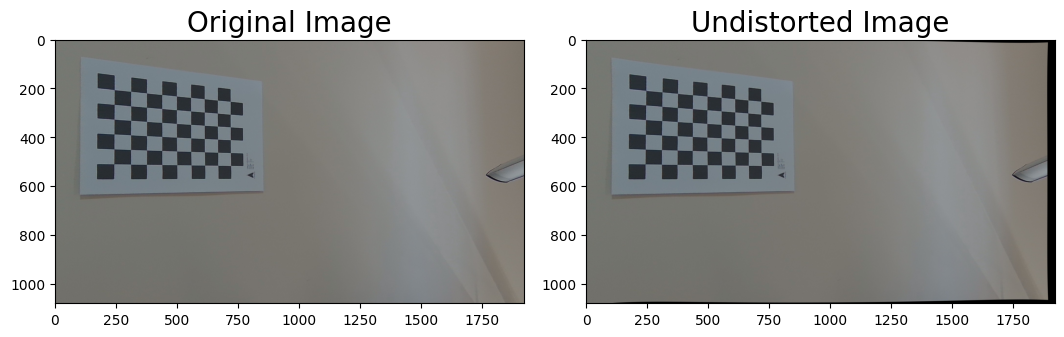

In [ ]:
IMAGE_INDEX = 10

img = mpimg.imread(f'images/{IMAGE_INDEX}.jpg') # Read in a test calibration image
undistorted_image = cv2.undistort(img, mtx, dist, None, mtx) # Generate the undistorted image
print(f"Used: {mtx} AND {dist}")

# Plot inline
%matplotlib inline
# View the results side-by-side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(undistorted_image)
ax2.set_title('Undistorted Image', fontsize=20)
plt.subplots_adjust(left=0.0, right=1.0, top=0.9, bottom=0.0)
plt.show()